In [1]:
import os, sys
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter
np.seterr(divide='ignore',invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = pd.read_csv("../Result/normal_data.csv")

data.drop(['id'],axis = 1, inplace = True)
index = data[data['score'] == 0].index
data.drop(index, axis = 0, inplace= True)
data.head()

,avg_identifier_length,max_identifier_length,avg_identifier,max_identifier,max_single_identifier,avg_arithmetic,avg_comparison,avg_assignment,avg_comma,avg_dot,...,avg_if,avg_space,max_indentation,avg_indentation,avg_comment,max_single_char,avg_blank,max_line_length,avg_line_length,score
0,6.8889,13,1.1818,5,4,0.0000,0.0000,0.1818,0.0909,0.1818,...,0.0909,1.0909,6,3.2000,0.0000,17,0.0909,59,26.4545,2.99
1,9.0000,24,1.2308,4,4,0.0000,0.0000,0.0000,0.0000,0.5385,...,0.0769,1.1538,3,2.0000,0.0769,26,0.0000,52,26.5385,3.35
2,8.6000,36,3.1111,6,4,0.3333,0.1111,0.1111,0.1111,1.0000,...,0.2222,3.4444,5,2.6667,0.0000,47,0.0000,118,57.1111,2.13
3,9.5000,22,0.7500,2,2,0.2500,0.1250,0.1250,0.0000,0.0000,...,0.1250,1.6250,4,1.8571,0.0000,13,0.1250,62,22.5000,3.64
4,7.4444,16,1.3750,5,2,0.0000,0.0000,0.0000,0.1250,0.5000,...,0.0000,0.1250,2,1.4286,0.0000,9,0.1250,47,16.7500,3.54


In [3]:
list = ['score', 'avg_comment', 'avg_identifier', 'max_indentation',
        'max_single_char', 'avg_dot', 'avg_keyword', 'avg_bracket',
            'avg_if', 'avg_assignment', 'avg_comparison']

name_list = ['avg_identifier_length','max_identifier_length','avg_identifier','max_identifier','max_single_identifier'
        ,'avg_arithmetic','avg_comparison','avg_assignment','avg_comma','avg_dot','avg_bracket','max_keyword'
        ,'avg_keyword','max_number','avg_number','avg_loop','avg_if','avg_space','max_indentation'
        ,'avg_indentation','avg_comment','max_single_char','avg_blank','max_line_length','avg_line_length'
        ,'score'
       ]

for element in name_list:
    if element not in list:
        data.drop([element], axis=1, inplace=True)

In [4]:
causal_graph = """digraph {
avg_assignment [pos="-0.587,-1.362"]
avg_bracket [pos="-1.586,-0.595"]
avg_comment [pos="-0.377,1.378"]
avg_comparison [pos="-1.881,0.031"]
avg_dot [pos="-1.142,-1.068"]
avg_identifier [pos="0.560,0.335"]
avg_if [pos="-1.605,0.589"]
avg_keyword [pos="0.511,-0.358"]
max_indentation [pos="-1.062,1.096"]
max_single_char [pos="0.231,0.995"]
score [pos="0.067,-1.018"]
avg_assignment -> avg_identifier
avg_bracket -> avg_identifier
avg_comment -> avg_bracket
avg_comment -> max_indentation
avg_comment -> score
avg_dot -> avg_identifier
avg_identifier -> avg_keyword
avg_identifier -> score
avg_if -> avg_comparison
avg_keyword -> avg_comparison
avg_keyword -> avg_if
max_indentation -> avg_if
max_indentation -> score
max_single_char -> avg_dot
}"""


score
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                                          
────────(Expectation(score|max_single_char,avg_comparison,avg_if,avg_assignmen
d[score]                                                                      

                                   
t,avg_keyword,avg_bracket,avg_dot))
                                   
Estimand assumption 1, Unconfoundedness: If U→{score} and U→score then P(score|score,max_single_char,avg_comparison,avg_if,avg_assignment,avg_keyword,avg_bracket,avg_dot,U) = P(score|score,max_single_char,avg_comparison,avg_if,avg_assignment,avg_keyword,avg_bracket,avg_dot)

## Realized estimand
b: score~score+max_single_char+avg_comparison+avg_if+avg_assignment+avg_keyword+avg_bracket+avg_dot
Target units: ate

## Estimate
Mean value: 1.0000000000000087

avg_comment
*** Causal Estimate ***

## Iden

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(score|avg_assignment,max_indentation,avg_bracket,avg_co
d[avg_dot]                                                                    

       
mment))
       
Estimand assumption 1, Unconfoundedness: If U→{avg_dot} and U→score then P(score|avg_dot,avg_assignment,max_indentation,avg_bracket,avg_comment,U) = P(score|avg_dot,avg_assignment,max_indentation,avg_bracket,avg_comment)

## Realized estimand
b: score~avg_dot+avg_assignment+max_indentation+avg_bracket+avg_comment+avg_dot*avg_bracket+avg_dot*avg_comment+avg_dot*max_indentation+avg_dot*avg_assignment
Target units: ate

## Estimate
Mean value: -0.2016214641342784
### Conditional Estimates
__categorical__avg_bracket  __categorical__avg_comment  __categorical__max_indentation  __categorical__

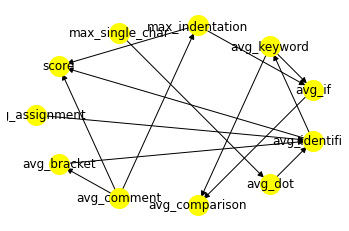

In [5]:
# measure the effect directly
for feature in list:
    print(feature)
    model= dowhy.CausalModel(
        data = data,
        graph = causal_graph.replace("\n", " "),
        treatment = feature,
        outcome = "score",
    )
    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(identified_estimand,
                              method_name="backdoor.linear_regression",target_units="ate")
    if feature == 'score':
        model.view_model()
    print(estimate)

In [6]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_assignment',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(score|max_single_char,max_indentation,avg_bracke
d[avg_assignment]                                                             

                       
t,avg_dot,avg_comment))
                       
Estimand assumption 1, Unconfoundedness: If U→{avg_assignment} and U→score then P(score|avg_assignment,max_single_char,max_indentation,avg_bracket,avg_dot,avg_comment,U) = P(score|avg_assignment,max_single_char,max_indentation,avg_bracket,avg_dot,avg_comment)

## Realized estimand
b: score~avg_assignment+max_single_char+max_indentation+avg_bracket+avg_dot+avg_comment+avg_assignment*avg_bracket+avg_assignment*max_single_char+avg_assignment*avg_dot+avg_assignment*max_indentation+avg_assignment*avg_comment
Target units: ate

## Estimate
Mean v

In [7]:
model= dowhy.CausalModel(
    data = data,
    graph = causal_graph.replace("\n", " "),
    treatment= 'avg_dot',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(score|avg_assignment,max_indentation,avg_bracket,avg_co
d[avg_dot]                                                                    

       
mment))
       
Estimand assumption 1, Unconfoundedness: If U→{avg_dot} and U→score then P(score|avg_dot,avg_assignment,max_indentation,avg_bracket,avg_comment,U) = P(score|avg_dot,avg_assignment,max_indentation,avg_bracket,avg_comment)

## Realized estimand
b: score~avg_dot+avg_assignment+max_indentation+avg_bracket+avg_comment+avg_dot*avg_bracket+avg_dot*avg_comment+avg_dot*max_indentation+avg_dot*avg_assignment
Target units: ate

## Estimate
Mean value: -0.2016214641342784
### Conditional Estimates
__categorical__avg_bracket  __categorical__avg_comment  __categorical__max_indentation  __categorical__

In [8]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_bracket',
    common_causes = 'avg_comment',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(score|max_single_char,avg_assignment,max_indentatio
d[avg_bracket]                                                                

                       
n,avg_dot,avg_comment))
                       
Estimand assumption 1, Unconfoundedness: If U→{avg_bracket} and U→score then P(score|avg_bracket,max_single_char,avg_assignment,max_indentation,avg_dot,avg_comment,U) = P(score|avg_bracket,max_single_char,avg_assignment,max_indentation,avg_dot,avg_comment)

## Realized estimand
b: score~avg_bracket+max_single_char+avg_assignment+max_indentation+avg_dot+avg_comment+avg_bracket*max_single_char+avg_bracket*avg_dot+avg_bracket*max_indentation+avg_bracket*avg_assignment
Target units: ate

## Estimate
Mean value: -0.17800873320095878
### Conditio

In [9]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_comparison',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(score|max_single_char,avg_if,avg_assignment,avg_
d[avg_comparison]                                                             

                                                                        
identifier,avg_keyword,max_indentation,avg_bracket,avg_dot,avg_comment))
                                                                        
Estimand assumption 1, Unconfoundedness: If U→{avg_comparison} and U→score then P(score|avg_comparison,max_single_char,avg_if,avg_assignment,avg_identifier,avg_keyword,max_indentation,avg_bracket,avg_dot,avg_comment,U) = P(score|avg_comparison,max_single_char,avg_if,avg_assignment,avg_identifier,avg_keyword,max_indentation,avg_bracket,avg_dot,avg_comment)

## Realized estimand
b: score~avg_compar

In [10]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_if',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
─────────(Expectation(score|max_single_char,max_indentation,avg_assignment,avg
d[avg_if]                                                                     

                                                         
_identifier,avg_keyword,avg_bracket,avg_dot,avg_comment))
                                                         
Estimand assumption 1, Unconfoundedness: If U→{avg_if} and U→score then P(score|avg_if,max_single_char,max_indentation,avg_assignment,avg_identifier,avg_keyword,avg_bracket,avg_dot,avg_comment,U) = P(score|avg_if,max_single_char,max_indentation,avg_assignment,avg_identifier,avg_keyword,avg_bracket,avg_dot,avg_comment)

## Realized estimand
b: score~avg_if+max_single_char+max_indentation+avg_assignment+avg_identifier+avg_keyword+avg_bracket+

In [11]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'max_indentation',
    common_causes = 'avg_comment', 
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(Expectation(score|max_single_char,avg_assignment,avg_identi
d[max_indentation]                                                            

                                                  
fier,avg_keyword,avg_bracket,avg_dot,avg_comment))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{max_indentation} and U→score then P(score|max_indentation,max_single_char,avg_assignment,avg_identifier,avg_keyword,avg_bracket,avg_dot,avg_comment,U) = P(score|max_indentation,max_single_char,avg_assignment,avg_identifier,avg_keyword,avg_bracket,avg_dot,avg_comment)

## Realized estimand
b: score~max_indentation+max_single_char+avg_assignment+avg_identifier+avg_keyword+avg_bracket+avg_dot+avg_comment+max_indentati

In [12]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_comment',
    outcome='score')
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                  
──────────────(Expectation(score|max_single_char,avg_assignment,avg_dot))
d[avg_comment]                                                           
Estimand assumption 1, Unconfoundedness: If U→{avg_comment} and U→score then P(score|avg_comment,max_single_char,avg_assignment,avg_dot,U) = P(score|avg_comment,max_single_char,avg_assignment,avg_dot)

## Realized estimand
b: score~avg_comment+max_single_char+avg_assignment+avg_dot+avg_comment*max_single_char+avg_comment*avg_dot+avg_comment*avg_assignment
Target units: ate

## Estimate
Mean value: 1.021351405502767
### Conditional Estimates
__categorical__max_single_char  __categorical__avg_dot  __categorical__avg_assignment
(4.999, 19.0]                   (-0.001, 0.181]         (-0.001, 0.0833]                 0.735546
     

In [13]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'max_single_char',
    outcome='score')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
──────────────────(Expectation(score|avg_assignment,max_indentation,avg_bracke
d[max_single_char]                                                            

               
t,avg_comment))
               
Estimand assumption 1, Unconfoundedness: If U→{max_single_char} and U→score then P(score|max_single_char,avg_assignment,max_indentation,avg_bracket,avg_comment,U) = P(score|max_single_char,avg_assignment,max_indentation,avg_bracket,avg_comment)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(score, [avg_identifier])*Derivative([avg_identifier], [
max_single_char]))
Estimand assumption 1, Full-mediation: avg_identifier intercepts (blocks) all directed paths from max_single_char to s,c,o,r,e.
Estimand assumption 2, 

In [14]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_identifier',
    outcome='score')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「Data Subsets Validation」
# The causal effect is estimated on the data subset. If the assumption is correct, the causal effect should not change much
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(score|max_single_char,max_indentation,avg_bracke
d[avg_identifier]                                                             

               
t,avg_comment))
               
Estimand assumption 1, Unconfoundedness: If U→{avg_identifier} and U→score then P(score|avg_identifier,max_single_char,max_indentation,avg_bracket,avg_comment,U) = P(score|avg_identifier,max_single_char,max_indentation,avg_bracket,avg_comment)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(score, [avg_dot, avg_assignment])*Derivative([avg_ident
ifier], [avg_dot, avg_assignment])**(-1))
Estimand assumption 1, As-if-random: If U→→score then ¬(U →→{avg_dot,avg_assignment})
Estimand assumption 2, Exclusion: If we remove {avg_dot,avg_assignment}→{avg_identifier}, then ¬({avg_dot,avg_

In [15]:
model= dowhy.CausalModel(
    data = data,
    graph=causal_graph.replace("\n", " "),
    treatment= 'avg_keyword',
    common_causes = 'avg_identifier',
    outcome='score')

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                          method_name="backdoor.linear_regression",target_units="ate")
print(estimate.target_estimand)
# 「Add Random Common Cause」
# If the hypothesis is correct, the causal effect will not change much after adding random confounding factors.
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

# 「Placebo Treatment」
# Replace the intervention with a random variable. If the hypothesis is correct, the causal effect should be close to 0
res_placebo=model.refute_estimate(identified_estimand, estimate,
      method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

# 「数据子集验证」。在数据子集上估计因果效应，如果假设正确，因果效应应该变化不大。
res_subset=model.refute_estimate(identified_estimand, estimate,
      method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(score|max_single_char,avg_assignment,avg_identifier
d[avg_keyword]                                                                

                                                  
,max_indentation,avg_bracket,avg_dot,avg_comment))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{avg_keyword} and U→score then P(score|avg_keyword,max_single_char,avg_assignment,avg_identifier,max_indentation,avg_bracket,avg_dot,avg_comment,U) = P(score|avg_keyword,max_single_char,avg_assignment,avg_identifier,max_indentation,avg_bracket,avg_dot,avg_comment)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
Expectation(Derivative(score, [avg_comparison])*Derivative([avg_comparison], [